In [6]:
#importar las librerias base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#importar las librerias especializadas
from lifelines import ExponentialFitter, WeibullFitter, LogNormalFitter, KaplanMeierFitter

In [9]:
#importar la base de datos 
empresas_Q = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [10]:
empresas_Q.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


**Descripcion de la base de datos**

La base de datos mide los años que tarda  en  quebrar  una  empresa  (desde  que se  crea  hasta  que quiebra).

1. la variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada(no se observó la quiebra en el periodo de observación). 
2. La variable mujer toma valores  de  0  si  el  fundador  de  la  empresa  es  hombre  y  1  si  el  fundador  de  la empresa  es  mujer.  
3. La  variable  tiempo  mide  los  años  que  tardo  en  quebrar  la empresa. 

In [11]:
# 3a) Ajuste un modelo de supervivencia exponencial 

exp = ExponentialFitter().fit(empresas_Q['tiempo'],empresas_Q['quebrar']) 

#riesgo de quebrar

exp.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


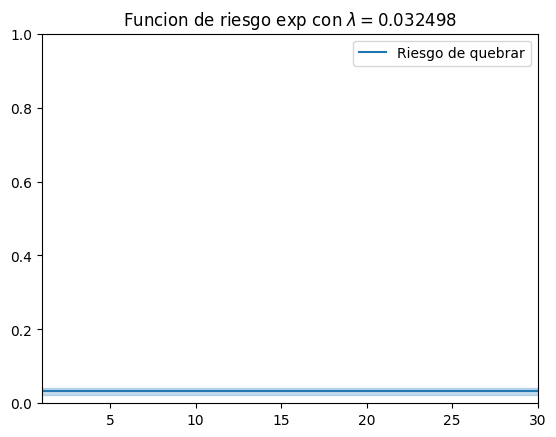

In [12]:
# 3b) Grafique la función de riesgo exponencial

exp.plot_hazard(label='Riesgo de quebrar'); #funcion de riesgo
plt.title('Funcion de riesgo exp con $\lambda=0.032498$')
plt.xlim(1,30)
plt.ylim(0,1);

In [13]:
# 3c) ¿Cuáles  el  riesgo  de  que una empresa  quiebre  según  la  función exponencial?
print('Segun la funcion exponencial, una empresa tiene un riesgo del 3.24% de caer en la quiebra')

Segun la funcion exponencial, una empresa tiene un riesgo del 3.24% de caer en la quiebra


In [14]:
# 4a) Ajuste un modelo Weibull de supervivencia 

mweibull = WeibullFitter().fit(empresas_Q['tiempo'],empresas_Q['quebrar'])

mweibull.hazard_


,Weibull_estimate
1.000000,0.007059
1.292929,0.008434
1.585859,0.009716
1.878788,0.010927
2.171717,0.012080
...,...
28.828283,0.072459
29.121212,0.072969
29.414141,0.073476
29.707071,0.073982


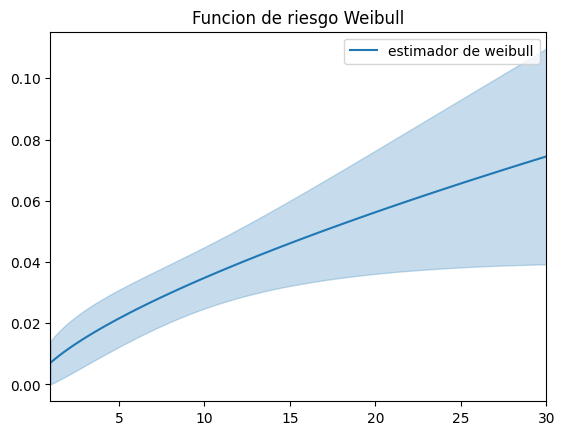

In [15]:
# 4b) Grafique la función de riesgo
mweibull.plot_hazard(label='estimador de weibull')
plt.title('Funcion de riesgo Weibull')
plt.xlim(1,30);

In [16]:
# 4c) ¿Qué forma tiene la función de riesgo? y ¿qué significa?
print('la funcion tiene una semi curva ascendente, lo que significa, segun este modelo, que entre mayor tiempo\ntiene la empresa, mayor es su riesgo de quebrar')

la funcion tiene una semi curva ascendente, lo que significa, segun este modelo, que entre mayor tiempo
tiene la empresa, mayor es su riesgo de quebrar


In [17]:
# 5a) Ajuste un modelo Log-Normal
mlogn = LogNormalFitter().fit(empresas_Q['tiempo'],empresas_Q['quebrar'])

mlogn.hazard_


,LogNormal_estimate
1.000000,0.003749
1.292929,0.006219
1.585859,0.008870
1.878788,0.011543
2.171717,0.014143
...,...
28.828283,0.036053
29.121212,0.035941
29.414141,0.035829
29.707071,0.035718


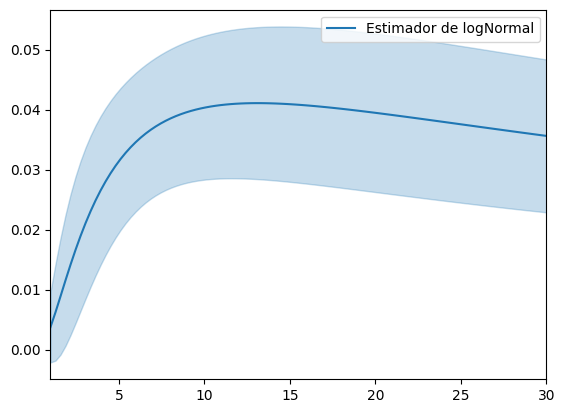

In [18]:
mlogn.plot_hazard(label='Estimador de logNormal')
plt.xlim(1,30);


In [19]:
# 5c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente
print('En base a lo que nos muestra la grafica, el periodo es creciente desde el primer a;o hasta los 10 a;os aproximadamente\nPor otra parte se norta decreciente de los 10 a;os en adelante')

En base a lo que nos muestra la grafica, el periodo es creciente desde el primer a;o hasta los 10 a;os aproximadamente
Por otra parte se norta decreciente de los 10 a;os en adelante


In [20]:
# 6a) Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.
km1 = KaplanMeierFitter().fit(empresas_Q['tiempo'],empresas_Q['quebrar'])

km1.event_table.head()


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,100,100
1.0,2,1,1,0,100
2.0,6,3,3,0,98
3.0,5,3,2,0,92
4.0,2,0,2,0,87


In [21]:
#funcion de supervivencia de kaplan M.
fs_km = km1.survival_function_
km1.survival_function_


,KM_estimate
timeline,
0.0,1.000000
1.0,0.990000
2.0,0.959694
3.0,0.928400
4.0,0.928400
5.0,0.917477
7.0,0.873261
8.0,0.829046
9.0,0.829046


In [57]:
#mediana de tiempo de supervivencia
med_fs_km = fs_km.median()


In [58]:
print(f'Lo que nos indica es sobre la relacion del tiempo con el riesgo de quebrar, en especifico nos habla\nsobre si una compa;ia llega a la mitad del tiempo de "vida" esperado, tendra un estimador de KM de {med_fs_km}de probabilidad de no quebrar')

Lo que nos indica es sobre la relacion del tiempo con el riesgo de quebrar, en especifico nos habla
sobre si una compa;ia llega a la mitad del tiempo de "vida" esperado, tendra un estimador de KM de KM_estimate    0.664841
dtype: float64de probabilidad de no quebrar


In [28]:
empresas_Q.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


In [34]:
# 6b) Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con 
#.plot_survival_function(ci_show=False)y  diga  si  las empresas administradas por hombres/mujeres quiebran más
# rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.
hom_emp=empresas_Q[empresas_Q['mujer']==0]
muj_emp=empresas_Q[empresas_Q['mujer']==1]

hom_km1 = KaplanMeierFitter().fit(hom_emp['tiempo'],hom_emp['quebrar'])
muj_km1 = KaplanMeierFitter().fit(muj_emp['tiempo'],muj_emp['quebrar'])

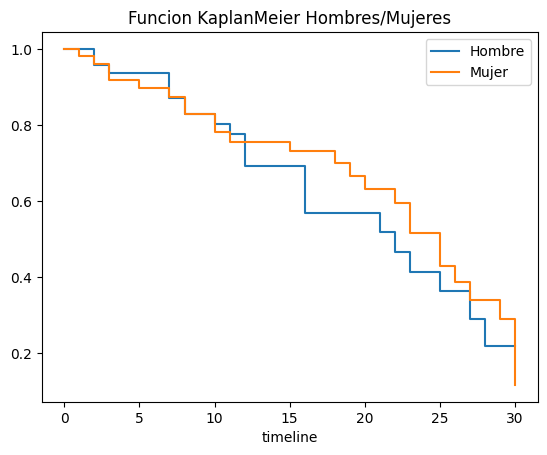

In [44]:
hom_km1.plot_survival_function(ci_show=False,label='Hombre')
muj_km1.plot_survival_function(ci_show=False,label='Mujer')
plt.title('Funcion KaplanMeier Hombres/Mujeres');

In [60]:
pip install jinja2


     ---------------------------------------- 0.0/133.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/133.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/133.1 kB ? eta -:--:--
     -------- ---------------------------- 30.7/133.1 kB 262.6 kB/s eta 0:00:01
     ----------- ------------------------- 41.0/133.1 kB 217.9 kB/s eta 0:00:01
     ----------------- ------------------- 61.4/133.1 kB 297.7 kB/s eta 0:00:01
     ------------------------- ----------- 92.2/133.1 kB 374.1 kB/s eta 0:00:01
     ------------------------------------ 133.1/133.1 kB 491.4 kB/s eta 0:00:00
  Obtaining dependency information for MarkupSafe>=2.0 from https://files.pythonhosted.org/packages/be/bb/08b85bc194034efbf572e70c3951549c8eca0ada25363afc154386b5390a/MarkupSafe-2.1.3-cp311-cp311-win_amd64.whl.metadata


In [61]:
# 6c) El profesor cree que las empresas fundadaspor hombres quiebran más rápido,   
#refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

from lifelines.statistics import logrank_test
LRT = logrank_test(hom_emp['tiempo'],muj_emp['tiempo'],hom_emp['quebrar'],muj_emp['quebrar'])

In [62]:
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

Como el p value es mayor a 0.05 entonces no tiene relevancia el sexo a la velocidad de la quiebra